## Observations and Insights 

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resource/Homework5_Mouse_metadata.csv"
study_results_path = "Resource/Homework5_Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.head()




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [46]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [47]:
# Combine the data into a single dataset
merge_mouse_df =pd.merge(mouse_metadata,study_results, on="Mouse ID", how="outer")
merge_mouse_df.head(60)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [48]:
merge_mouse_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [49]:
# Checking the number of mice in the DataFrame.
count1= merge_mouse_df["Mouse ID"].nunique()
count1

249

In [50]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicates= merge_mouse_df[merge_mouse_df.duplicated(['Mouse ID', 'Timepoint'])]
print(duplicates)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [51]:
#Delete the duplicate mouse 
NEW1=merge_mouse_df.set_index('Mouse ID')
NEW2=NEW1.drop(index='g989')
NEW2 = NEW2.reset_index()

In [52]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
New=merge_mouse_df.set_index('Mouse ID')
NEW=New.drop(index='g989')
NEW=NEW.reset_index()
NEW

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [53]:
NEW.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [54]:
# Checking the number of mice in the clean DataFrame.
count2= NEW["Mouse ID"].nunique()
count2

248

## Summary Statistics

In [55]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
    
NEW_bg=NEW.groupby("Drug Regimen")
mean_Tumor=((NEW_bg["Tumor Volume (mm3)"]).mean()).round(2)
median_Tumor=((NEW_bg["Tumor Volume (mm3)"]).median()).round(2)
var_Tumor = (NEW_bg["Tumor Volume (mm3)"].std())
sd_Tumor = (NEW_bg["Tumor Volume (mm3)"].var())
sem_Tumor =(NEW_bg["Tumor Volume (mm3)"].sem())
stas_dr={"Mean Tumor Volume": mean_Tumor,"Median Tumor Volume": median_Tumor,"Variance Tumor Volume": var_Tumor,"Std. Dev Tumor Volume":sd_Tumor,"SEM of Tumor Volume":sem_Tumor}
stas_df=pd.DataFrame(stas_dr)
stas_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std. Dev Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,4.994774,24.947764,0.329346
Ceftamin,52.59,51.78,6.268188,39.290177,0.469821
Infubinol,52.88,51.82,6.567243,43.128684,0.492236
Ketapril,55.24,53.70,8.279709,68.553577,0.603860
Naftisol,54.33,52.51,8.134708,66.173479,0.596466
Placebo,54.03,52.29,7.821003,61.168083,0.581331
Propriva,52.32,50.45,6.622085,43.852013,0.544332
Ramicane,40.22,40.67,4.846308,23.486704,0.320955
Stelasyn,54.23,52.43,7.710419,59.450562,0.573111


## Bar Plots

In [56]:
#Making a data set fo the plt
time=NEW.groupby("Drug Regimen")
t_vs_n= time["Mouse ID"].count()
Time_Mice_obserbations=t_vs_n.sort_values(ascending = False)
Time_Mice=pd.DataFrame(Time_Mice_obserbations)
Time_Mice.columns=["Total_Count_Mice"]
Time_Mice=Time_Mice.reset_index()
Drug_Regimen=Time_Mice["Drug Regimen"]
Total_Count_Mice=Time_Mice["Total_Count_Mice"]
Time_Mice

,Drug Regimen,Total_Count_Mice
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Stelasyn,181
6,Placebo,181
7,Infubinol,178
8,Ceftamin,178
9,Propriva,148


Text(0, 0.5, '# Mice')

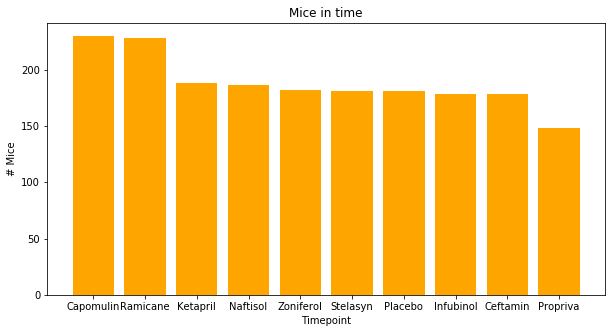

In [57]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
plt.figure(figsize=(10,5))
plt.bar(Drug_Regimen,Total_Count_Mice, color='orange')
plt.title("Mice in time")
plt.xlabel("Timepoint")
plt.ylabel("# Mice")

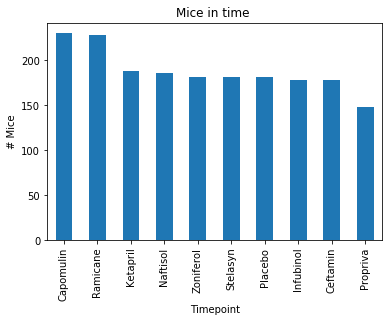

In [58]:
# (Easy and faster) Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
(NEW.groupby('Drug Regimen')['Mouse ID'].count()).sort_values(ascending = False).plot(kind='bar')
plt.title("Mice in time ")
plt.xlabel("Timepoint")
plt.ylabel("# Mice")
plt.show()

## Pie Plots

In [59]:
#Making a data set fo the plt
sex=NEW.groupby(["Sex"])
s_vs_n= sex["Mouse ID"].nunique()
Sex_Mice=pd.DataFrame(s_vs_n)
Sex_Mice.columns=["Total_Count_by_sex"]
Sex=["Female","Male"]
Sex_Mice

,Total_Count_by_sex
Sex,
Female,123
Male,125


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F2DAA92F10>],
      dtype=object)

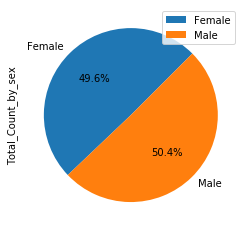

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Sex_Mice.plot.pie(subplots=True,startangle=45,autopct="%1.1f%%")

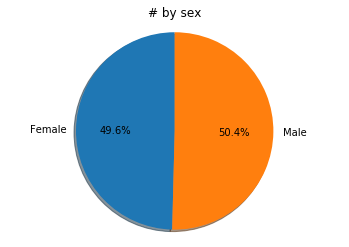

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("# by sex")
plt.pie(Sex_Mice["Total_Count_by_sex"],labels=Sex,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [62]:
#Merging the data to get the max tumor volume by mouse id
Mice_group = NEW.groupby("Mouse ID").max()
Mice_group = Mice_group.reset_index()
join=pd.merge(Mice_group[["Mouse ID","Timepoint"]],NEW,on=["Mouse ID","Timepoint"],how="left")
join

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [63]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Calculation for Capomulin
capomulin_df = join.loc[join["Drug Regimen"] == "Capomulin", :]
tumor_volume_ca = capomulin_df["Tumor Volume (mm3)"]
quartiles = tumor_volume_ca.quantile([.25,.5,.75])
lowerq= quartiles[0.25]
upperq= quartiles[0.75]
IQR = upperq -  lowerq
lower_bound = lowerq - (1.5*IQR)
upper_bound = upperq + (1.5*IQR)

print(f"The interquartile range of final tumor volume is: {IQR}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The interquartile range of final tumor volume is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [64]:
# Calculation for Ramicane
ramicane_df = join.loc[join["Drug Regimen"] == "Ramicane", :]
tumor_volume_ra = ramicane_df["Tumor Volume (mm3)"]
quartiles = tumor_volume_ra.quantile([.25,.5,.75])
lowerq= quartiles[0.25]
upperq= quartiles[0.75]
IQR = upperq -  lowerq
lower_bound = lowerq - (1.5*IQR)
upper_bound = upperq + (1.5*IQR)

print(f"The interquartile range of final tumor volume is: {IQR}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The interquartile range of final tumor volume is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [65]:
# Calculation for Infubinol
infubinol_df = join.loc[join["Drug Regimen"] == "Infubinol", :]
tumor_volume_in = infubinol_df["Tumor Volume (mm3)"]
quartiles = tumor_volume_in.quantile([.25,.5,.75])
lowerq= quartiles[0.25]
upperq= quartiles[0.75]
IQR = upperq -  lowerq
lower_bound = lowerq - (1.5*IQR)
upper_bound = upperq + (1.5*IQR)

print(f"The interquartile range of final tumor volume is: {IQR}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The interquartile range of final tumor volume is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [66]:
# Calculation for Ceftamin
Ceftamin_df = join.loc[join["Drug Regimen"] == "Ceftamin", :]
tumor_volume_ce = Ceftamin_df["Tumor Volume (mm3)"]
quartiles = tumor_volume_ce.quantile([.25,.5,.75])
lowerq= quartiles[0.25]
upperq= quartiles[0.75]
IQR = upperq -  lowerq
lower_bound = lowerq - (1.5*IQR)
upper_bound = upperq + (1.5*IQR)

print(f"The interquartile range of final tumor volume is: {IQR}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The interquartile range of final tumor volume is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


(20, 80)

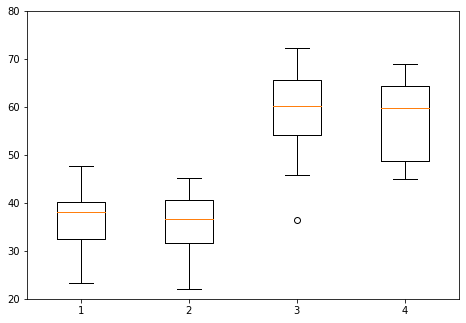

In [67]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig = plt.figure()
data_plot = [tumor_volume_ca,tumor_volume_ra,tumor_volume_in,tumor_volume_ce]

ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(data_plot)
plt.ylim(20,80)


## Line and Scatter Plots

In [68]:
capomulin_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2
80,i557,45,Capomulin,Female,1,24,47.685963,1
83,i738,45,Capomulin,Female,23,20,37.311846,2
85,j119,45,Capomulin,Female,7,23,38.125164,1
87,j246,35,Capomulin,Female,21,21,38.753265,1
108,l509,45,Capomulin,Male,17,21,41.483008,3


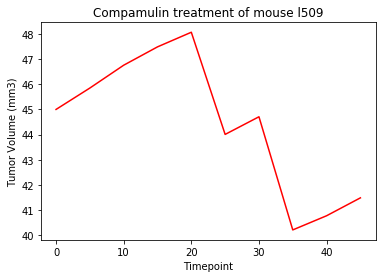

In [69]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
l509=NEW.loc[NEW["Mouse ID"] == "l509", :]
plt.plot(l509["Timepoint"],l509["Tumor Volume (mm3)"], color="red")
plt.title("Compamulin treatment of mouse l509")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

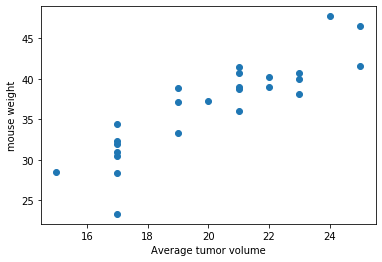

In [70]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(capomulin_df.iloc[:,5],capomulin_df.iloc[:,6])
plt.xlabel('Average tumor volume')
plt.ylabel('mouse weight')
plt.show()
x_values = capomulin_df.iloc[:,5]
y_values = capomulin_df.iloc[:,6]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Average tumor volume')
plt.ylabel('mouse weight')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

## Correlation and Regression

The correlation between both factors is 0.88


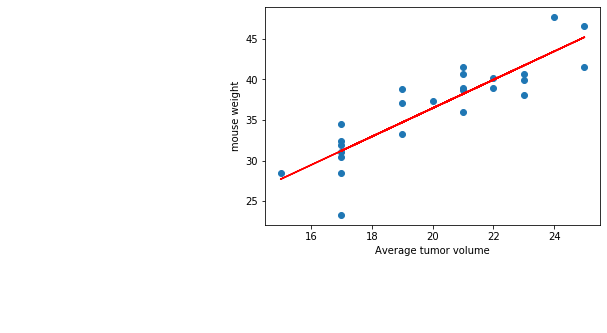

In [73]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_df.iloc[:,5]
y_values = capomulin_df.iloc[:,6]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Average tumor volume')
plt.ylabel('mouse weight')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()